In [1]:
import pandas as pd
data = pd.read_csv('files/Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [5]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

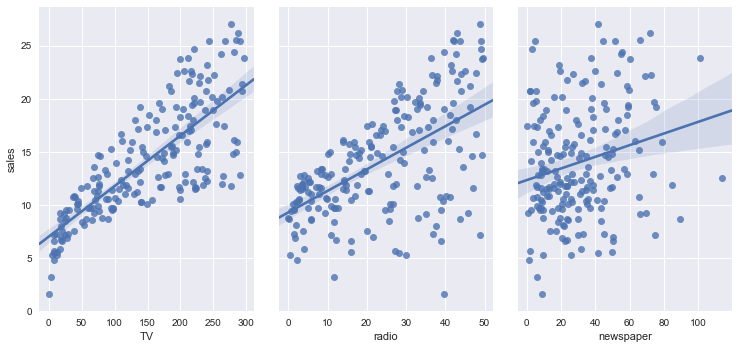

In [12]:
# visualize the relationship between the features and the response using scatterplots
# this produces pairs of scatterplot as shown
# use aspect= to control the size of the graphs
# use kind='reg' to plot linear regression on the graph
sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', size=5, aspect=0.7, kind='reg')

<p>Linear regression</p>
                    <ul>
                        <li>Strong relationship between TV ads and sales</li>
                        <li>Weak relationship between Radio ads and sales</li>
                        <li>Very weak to no relationship between Newspaper ads and sales</li>
                    </ul>

If the relationship is highly non-linear as with many scenarios, linear relationship will not effectively model the relationship and its prediction would not be accurate

In [13]:
feature_cols = ['TV', 'radio', 'newspaper']
X = data[feature_cols]
y = data.sales

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
# default split is 75% for training and 25% for testing

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150L,)
(50L,)


### Linear Rigression

In [22]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
print linreg.intercept_
print linreg.coef_

2.87696662232
[ 0.04656457  0.17915812  0.00345046]


In [26]:
zip(feature_cols, linreg.coef_)

[('TV', 0.046564567874150281),
 ('radio', 0.17915812245088836),
 ('newspaper', 0.0034504647111804347)]

$$y = 2.88 + 0.0466 \times TV + 0.179 \times Radio + 0.00345 \times Newspaper$$

<p>How do we interpret the <strong>TV coefficient</strong> (0.0466)?</p>
<ul>
                        <li>For a given amount of Radio and Newspaper ad spending, <strong>a "unit" increase in TV ad spending</strong> is associated with a <strong>0.0466 "unit" increase in Sales</strong>.</li>
                        <li>Or more clearly: For a given amount of Radio and Newspaper ad spending, <strong>an additional $1,000 spent on TV ads</strong> is associated with an <strong>increase in sales of 46.6 items</strong>.</li>
                    </ul>

In [27]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

### Model evaluation metrics for regression
<p>Evaluation metrics for classification problems, such as <strong>accuracy</strong>, are not useful for regression problems. Instead, we need evaluation metrics designed for comparing continuous values.</p>
                    <p>Let's create some example numeric predictions, and calculate <strong>three common evaluation metrics</strong> for regression problems:</p>

In [28]:
# define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

In [33]:
import numpy as np
from sklearn import metrics

In [30]:
# Mean Absolute Error (MAE) is the mean of the absolute value of the errors:
print metrics.mean_absolute_error(true,pred)

10.0


In [31]:
# Mean Squared Error (MSE) 
print metrics.mean_squared_error(true,pred)
# mean of square of each absolute error

150.0


In [34]:
# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.2474487139


### Computing the RMSE for our Sales predictions

In [38]:
y_pred = linreg.predict(X_test)
mse = metrics.mean_squared_error(y_pred,y_test)
rmse = np.sqrt(mse)
print rmse
# OR print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.40465142303


### Feature Selection

Lets remove <strong> newspaper </strong> and check RMSE

In [41]:
feature_cols = ["TV","radio"]
X = data[feature_cols]
y = data['sales']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

linreg.fit(X_train,y_train)
y_pred = linreg.predict(X_test)

print np.sqrt(metrics.mean_squared_error(y_pred,y_test))

1.38790346994


The RMSE <strong>decreased</strong> when we removed Newspaper from the model.<e> (Error is something we want to minimize, so a lower number for RMSE is better.)</e>. Thus, it is unlikely that this feature is useful for predicting Sales, and <strong>should be removed from the model.</strong>